In [1]:
import spacy
import en_core_sci_sm
import en_core_sci_md
import en_ner_bc5cdr_md

KeyboardInterrupt: 

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

<Axes: >

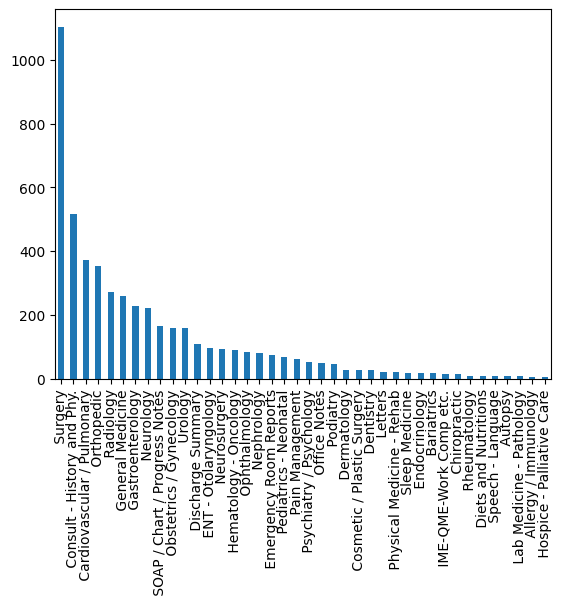

In [ ]:
print(df['medical_specialty'].value_counts()[0:40])
df['medical_specialty'].value_counts().plot(kind='bar')

<Axes: >

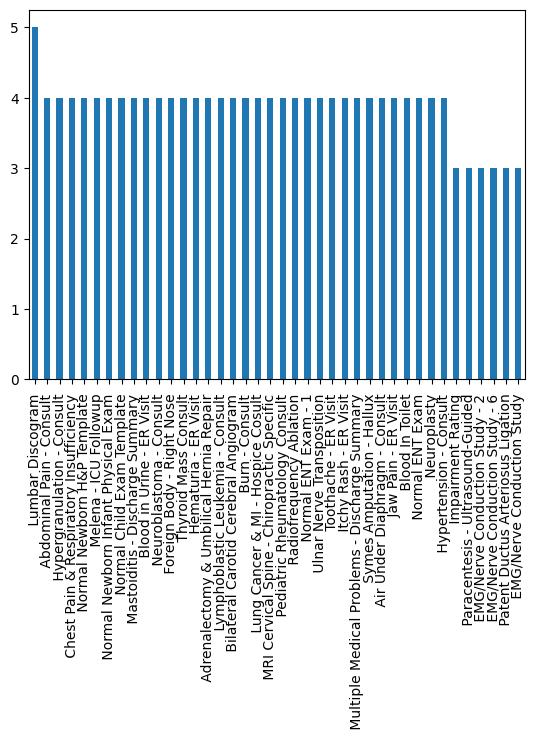

In [ ]:
df['sample_name'].value_counts()[0:40].plot(kind='bar')

In [ ]:
from spacy import displacy
nlp = en_ner_bc5cdr_md.load()
doc = nlp(df['transcription'][0])
display_image = displacy.render(doc, style='ent', jupyter=True)

In [2]:
import pandas as pd
df = pd.read_csv("mtsamples.csv")
df.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [3]:
import nltk

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

In [5]:
disease_set = []
for disease in list(df['medical_specialty'].unique()):
    disease_set.append(disease.lower()) if disease.lower() not in stopwords and len(disease.lower()) > 2 else None
disease_set

[' allergy / immunology',
 ' bariatrics',
 ' cardiovascular / pulmonary',
 ' neurology',
 ' dentistry',
 ' urology',
 ' general medicine',
 ' surgery',
 ' speech - language',
 ' soap / chart / progress notes',
 ' sleep medicine',
 ' rheumatology',
 ' radiology',
 ' psychiatry / psychology',
 ' podiatry',
 ' physical medicine - rehab',
 ' pediatrics - neonatal',
 ' pain management',
 ' orthopedic',
 ' ophthalmology',
 ' office notes',
 ' obstetrics / gynecology',
 ' neurosurgery',
 ' nephrology',
 ' letters',
 ' lab medicine - pathology',
 ' ime-qme-work comp etc.',
 ' hospice - palliative care',
 ' hematology - oncology',
 ' gastroenterology',
 ' ent - otolaryngology',
 ' endocrinology',
 ' emergency room reports',
 ' discharge summary',
 ' diets and nutritions',
 ' dermatology',
 ' cosmetic / plastic surgery',
 ' consult - history and phy.',
 ' chiropractic',
 ' autopsy']

In [6]:
%pip install simpletransformers


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install Cython sympy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from simpletransformers.language_representation import RepresentationModel
model = RepresentationModel(
    model_type="bert",
    model_name="bert-base-uncased",
    use_cuda = False
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

In [12]:
len(disease_set[0])

21

In [19]:
word_vectors = model.encode_sentences(df['description'])


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 68 and the array at index 1 has size 62

In [ ]:
for text, emb in zip(df['description'], word_vectors):
    print(f"Text: {text}")
    print(f"Embedding: {emb}")
    break